In [2]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

debug = 1 #set to 1 to see each step set to 0 to run fast
cursed = 0 #a weird bug i wanted to show to a freind dont ever set to 1 (ill delet this once ive shown them)

take in the image of the dice and set it up corectly

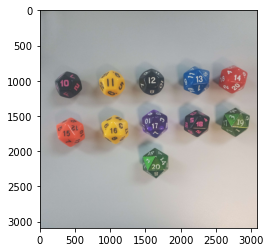

In [3]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
diceRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
diceRaw = cv2.cvtColor(diceRaw,cv2.COLOR_RGB2BGR)
if debug == 1:
    plt.imshow(diceRaw)

make the image grey

In [4]:
diceGrey = cv2.cvtColor(diceRaw, cv2.COLOR_BGR2GRAY)
if debug == 1:
    plt.imshow(diceGrey)

threhold the image (using stats!)

In [5]:
#MAGIC
thresholdConsant = (np.mean(diceGrey) + np.std(diceGrey))/25
threshholdedAllDice = cv2.adaptiveThreshold(diceGrey, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
if debug ==1:
    plt.figure(figsize=(100,100))
    plt.imshow(threshholdedAllDice)

preform some clean up on the image so that making the conturs dosent take a millon years

In [6]:
#MAGIC 
circle4x4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
circle10x10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
circle3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
circle15x15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

diceMask = cv2.erode(threshholdedAllDice,circle4x4)
diceMask = cv2.dilate(diceMask,circle15x15)
#diceMask = cv2.erode(threshholdedAllDice,circle15x15)
#diceMask = cv2.dilate(diceMask,circle15x15)
#diceMask = cv2.dilate(diceMask,circle15x15)


if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

where going to make a few assumtions here:

    1 the largeret contour is a dice

    2 any contur 50 smaller than the largest contur isnt a dice
    
    with this we can filter out all the little dots that got left over

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


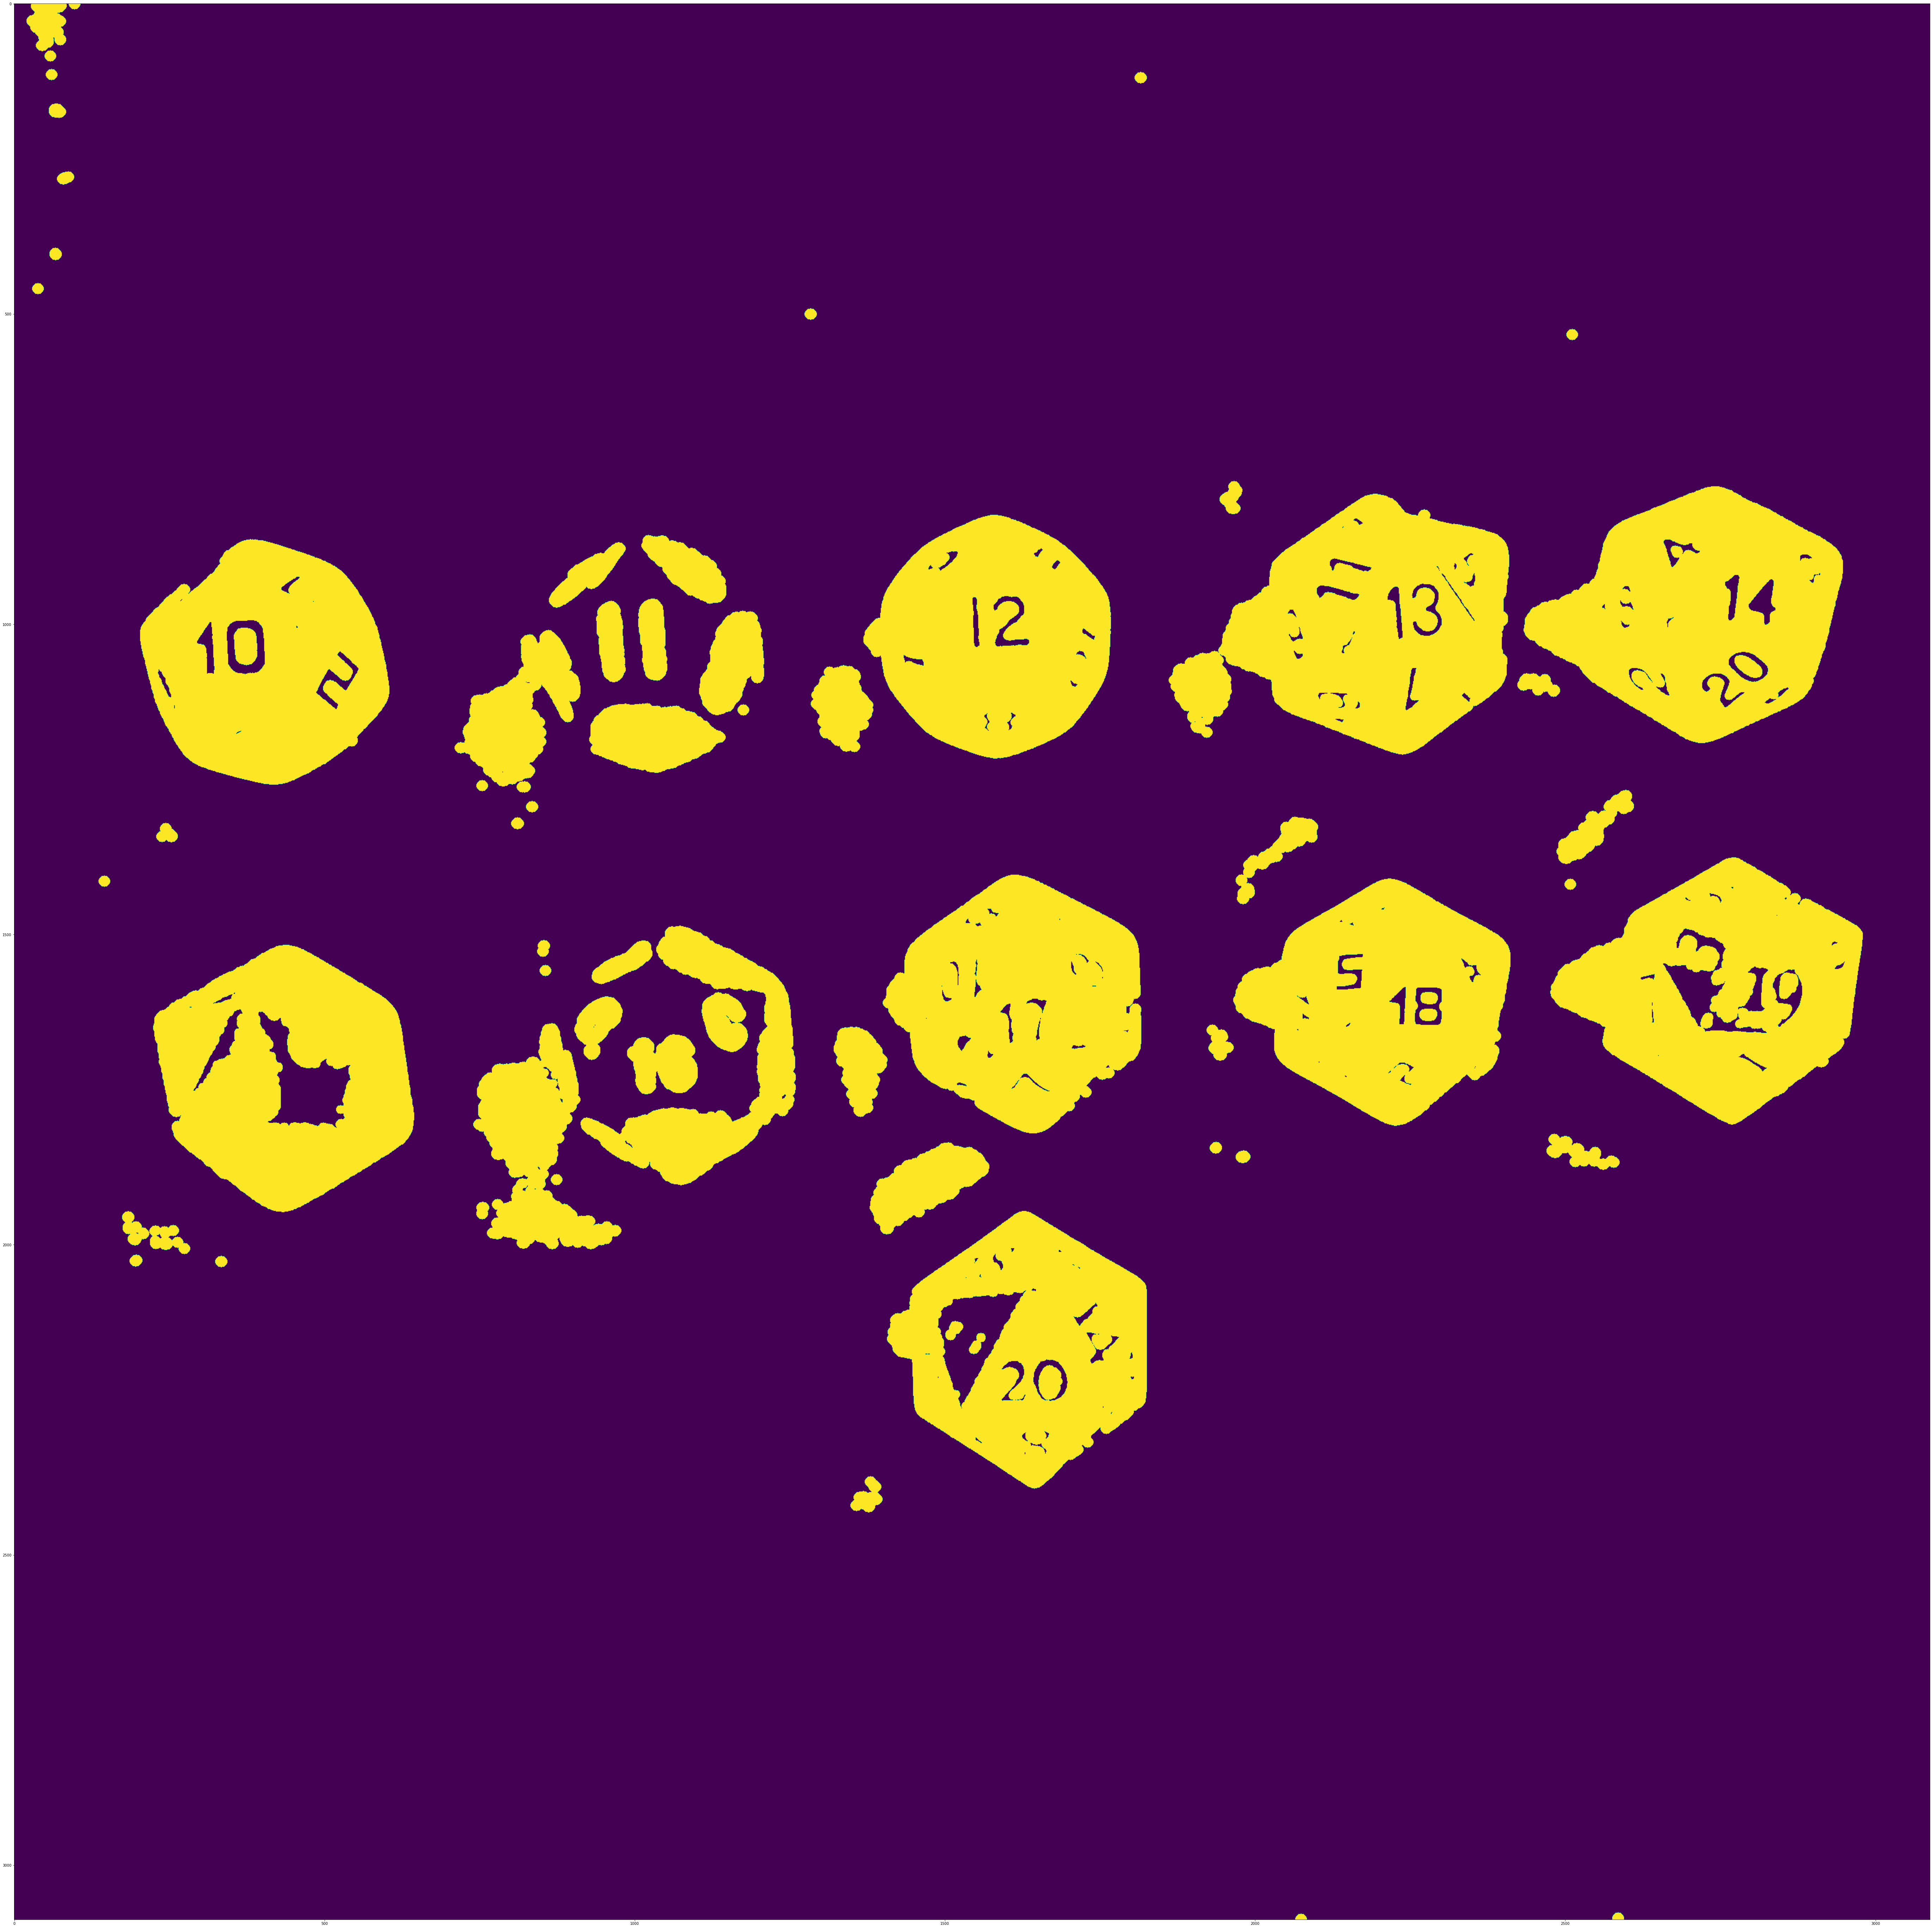

In [7]:
#step 1 getting the largest contur
contours, hierarchy  = cv2.findContours(diceMask, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
if debug == 1:
    tempImg = cv2.drawContours(diceMask, contours, -1, (255), 3)
    plt.figure(figsize=(100,100))
    plt.imshow(tempImg)

largestContour = 0
for i in range(len(hierarchy[0])):
    if debug == 1:
        print(i)
    if (cv2.contourArea(contours[i]) > cv2.contourArea(contours[largestContour])):
        largestContour = i

so now that we have the largest contur where going to check each contur and see if its small than 50% of the largest one
if it is discard it if it isnt we will add its bounding box to the array

bounding boxes have a X cord a Y cord and a height and a width so the array is a 2d array with that strucher

In [8]:
#some cursed stuff that doent work
if cursed == 1:
    firstArrayToAdd = [0,0,0,0]
    firstArrayToAdd[0],arrayToAdd[1],arrayToAdd[2],arrayToAdd[3] = cv2.boundingRect(contours[largestContour])
    boundingBoxes = [firstArrayToAdd]
    for i in range(len(hierarchy[0])):
        if debug == 1:
            print(cv2.boundingRect(contours[i]))
        if (cv2.contourArea(contours[i]) > (cv2.contourArea(contours[largestContour]))/2):
            arrayToAdd[0],arrayToAdd[1],arrayToAdd[2],arrayToAdd[3] = cv2.boundingRect(contours[i])
            if debug == 1:
                print(arrayToAdd)
            boundingBoxes.extend([arrayToAdd])
            if debug == 1:
                print("added:")
                print(arrayToAdd)
                print("bounding boxes is now:")
                print(boundingBoxes)
    if debug ==1:
        print(boundingBoxes)
else:
    boundingBoxes = []
    for i in range(len(hierarchy[0])):
        if debug == 1:
            print(cv2.boundingRect(contours[i]))
        if (cv2.contourArea(contours[i]) > (cv2.contourArea(contours[largestContour]))/2):
            j = len(boundingBoxes)
            boundingBoxes.extend([cv2.boundingRect(contours[i])])
    if debug == 1:
        print("bounding boxes is:")
        print(boundingBoxes)
    

(2067, 3080, 15, 8)
(2578, 3078, 15, 10)
(1350, 2399, 48, 31)
(1373, 2375, 23, 23)
(326, 2020, 16, 15)
(188, 2018, 17, 16)
(256, 1989, 26, 25)
(220, 1970, 44, 37)
(1409, 1948, 415, 444)
(176, 1948, 40, 52)
(747, 1933, 17, 25)
(772, 1928, 15, 15)
(867, 1888, 15, 15)
(1971, 1850, 20, 17)
(1381, 1837, 189, 145)
(1929, 1836, 16, 16)
(2472, 1823, 114, 55)
(990, 1663, 110, 93)
(1323, 1651, 83, 142)
(1924, 1647, 40, 55)
(742, 1645, 235, 361)
(905, 1602, 74, 99)
(1110, 1595, 71, 93)
(849, 1551, 15, 15)
(226, 1519, 417, 427)
(933, 1512, 94, 67)
(845, 1511, 17, 24)
(915, 1488, 343, 415)
(1973, 1419, 25, 31)
(2501, 1412, 15, 15)
(1967, 1412, 443, 395)
(138, 1407, 15, 15)
(1402, 1406, 413, 413)
(1971, 1405, 15, 16)
(2478, 1378, 500, 427)
(231, 1322, 31, 28)
(803, 1313, 17, 16)
(1983, 1312, 117, 96)
(827, 1287, 16, 15)
(2488, 1269, 121, 116)
(812, 1255, 19, 15)
(747, 1253, 15, 15)
(1168, 1131, 15, 15)
(929, 1129, 216, 109)
(2425, 1081, 65, 35)
(1286, 1068, 97, 137)
(1863, 1045, 98, 137)
(712, 1011,

time to crop the orginal image into indvidual dice

In [9]:
diceImages = []
print((np.size(boundingBoxes)/4))
for i in range(0,int((np.size(boundingBoxes)/4))):#posibly the worst line of code ive ever writen
    x,y,w,h = boundingBoxes[i]
    diceImages.append(diceRaw[y:y+h,x:x+w])
    if debug == 1:
        print(i)
        print(boundingBoxes[i])

9.0
0
(1409, 1948, 415, 444)
1
(226, 1519, 417, 427)
2
(1967, 1412, 443, 395)
3
(1402, 1406, 413, 413)
4
(2478, 1378, 500, 427)
5
(205, 865, 398, 392)
6
(1371, 826, 395, 389)
7
(1943, 792, 465, 417)
8
(2435, 780, 511, 410)


ok so now that we have those images we need to detect which kind of dice they are and run a top face idenfication program on them and then read the number out of that good luck us!

In [10]:
#debuing heres what we got:
plt.figure(figsize=(100,100))
i = 1
for image in diceImages:
    plt.subplot(3,3,i),plt.imshow(image)
    i += 1

exporting the dice as indvidual images

this will make working with them easier for step 2

In [11]:
i = 1
for image in diceImages:
    imageI = image
    if(fileName[-4:] == ".jpg" or fileName[5:] == ".jpeg"):
        imageI = cv2.cvtColor(imageI,cv2.COLOR_BGR2RGB)
    saveLoc = easygui.filesavebox(default="die"+str(i)+".png", filetypes=["*.jpg","*.jpeg","*.png"])
    i += 1
    isWritten = cv2.imwrite(saveLoc,imageI)
    if isWritten:
        print("worked!")

worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
worked!
